In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from ipywidgets import Layout, Button, Box
from nested_dict import nested_dict
import ipywidgets as widgets

import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
artifacts_dir = "/etc/skel/sandmark-nightly/parallel/"

In [3]:
bench_files = []

artifacts_path = artifacts_dir.split("/parallel/")[0]
# print(artifacts_path)

for root, dirs, files in os.walk(artifacts_dir):
#     print(dirs)
    for file in files:
#         print(file)
        if file.endswith("_1.orunchrt.summary.bench"):
            # print(root)
            f = root.split("/parallel/")
#             print(f)
            bench_files.append((os.path.join(root, file)))

# print(bench_files[0])

In [4]:
for b in bench_files :
    print(b + '\n')

/etc/skel/sandmark-nightly/parallel/20210527_084314/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains_1.orunchrt.summary.bench

/etc/skel/sandmark-nightly/parallel/20210527_084314/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains+effects_1.orunchrt.summary.bench

/etc/skel/sandmark-nightly/parallel/20210601_000015/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains_1.orunchrt.summary.bench

/etc/skel/sandmark-nightly/parallel/20210601_000015/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains+effects_1.orunchrt.summary.bench

/etc/skel/sandmark-nightly/parallel/20210528_174921/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains_1.orunchrt.summary.bench

/etc/skel/sandmark-nightly/parallel/20210528_174921/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains+effects_1.orunchrt.summary.bench

/etc/skel/sandmark-nightly/parallel/20210602_000014/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains_1.orunchrt.summary.bench

/etc/skel/sandmark-nightly/parallel/20

In [5]:
benches = nested_dict(2, list)
for x in bench_files:
    l = x.split("/parallel/")[1]
#     print(l)
    d = l.split("/")
#     print(d)
    timestamp  = d[0]
    commit     = d[1]
    variant    = d[2]
    value      = timestamp + " " + commit + " " + variant
    benches[timestamp][commit].append(value)
benches = benches.to_dict()

In [6]:
benches

{'20210527_084314': {'80580f1d913a70fd3cb4847f828ce6a7d284a05c': ['20210527_084314 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+domains_1.orunchrt.summary.bench',
   '20210527_084314 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+domains+effects_1.orunchrt.summary.bench']},
 '20210601_000015': {'80580f1d913a70fd3cb4847f828ce6a7d284a05c': ['20210601_000015 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+domains_1.orunchrt.summary.bench',
   '20210601_000015 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+domains+effects_1.orunchrt.summary.bench']},
 '20210528_174921': {'80580f1d913a70fd3cb4847f828ce6a7d284a05c': ['20210528_174921 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+domains_1.orunchrt.summary.bench',
   '20210528_174921 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+domains+effects_1.orunchrt.summary.bench']},
 '20210602_000014': {'80580f1d913a70fd3cb4847f828ce6a7d284a05c': ['20210602_000014 80580f1d913a70fd3cb4847f828ce6a7d284a05c 4.12.0+domains_1.orunchrt.summary.bench

In [7]:
def f(x): return x

def disp(benches):    
    def select_commit(timestamp):
        commitW.options = benches[timestamp]

    def select_variant(commit):
        variantW.options = commit
    
    def stub(variant):
        return None
    
    timestampW = widgets.Dropdown(options=benches.keys(), description='Timestamp', disabled=False)
    timestampS = timestampW.value
    timestampD = widgets.interactive(select_commit, timestamp=timestampW)
    
    commitW = widgets.Dropdown(options=benches[timestampS].keys(), description='Commit', disabled=False)
    commitS = commitW.value
    commitD = widgets.interactive(select_variant, commit=commitW)
    
#     variant_options = [x.split(' ')[2] for x in benches[timestampS][commitS]]
    variantW = widgets.Dropdown(options=benches[timestampS][commitS], description='Variant', disabled=False)
    variantS = variantW.value
    variantD = widgets.interactive(stub, variant=variantW)

    items_layout = Layout( width='auto' )
    
    box_layout = Layout(display='flex',
                       flex_flow='row wrap',
                       align_items='flex-start',
                       #border='solid',
                       width='100%')
    
    items = [timestampD, commitD, variantD]
    box = Box(children=items, layout=box_layout)
#     print(box)
    display(box)
    return (timestampD, commitD, variantD)

def get_filename(timestamp, variant):
    timestamp = timestamp.children[0].value
    commit_id = variant.children[0].value.split(' ')[1]
    variant   = variant.children[0].value.split(' ')[2] 
    filename = os.path.join(
        artifacts_path, 
        "parallel", 
        timestamp,
        commit_id,
        variant
        )
    print(filename)
    return filename

In [8]:
comparisons = interactive(f, x=widgets.IntText(value=2, 
                                               description='Comparisons', 
                                               disabled=False))
display(comparisons)

interactive(children=(IntText(value=2, description='Comparisons'), Output()), _dom_classes=('widget-interact',…

In [9]:
print(comparisons.result)

2


In [10]:
matrix = [[0 for x in range(4)] for y in range(comparisons.result)]  
    
for i in range(comparisons.result):
    matrix[i][0], matrix[i][1], matrix[i][2] = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210527_084314', '20210601_00…

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210527_084314', '20210601_00…

In [11]:
for i in range(comparisons.result):
    matrix[i][3] = get_filename(matrix[i][0], matrix[i][2])

# print(matrix[0][2])
# print(matrix[1][2])

/etc/skel/sandmark-nightly/parallel/20210527_084314/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains_1.orunchrt.summary.bench
/etc/skel/sandmark-nightly/parallel/20210527_084314/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains_1.orunchrt.summary.bench


In [12]:
selected_files = []
for i in range (comparisons.result):
    print(matrix[i][3])
    selected_files.append(matrix[i][3])

# print(selected_files)

/etc/skel/sandmark-nightly/parallel/20210527_084314/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains_1.orunchrt.summary.bench
/etc/skel/sandmark-nightly/parallel/20210527_084314/80580f1d913a70fd3cb4847f828ce6a7d284a05c/4.12.0+domains_1.orunchrt.summary.bench


In [13]:
data_frames = []

# print(os.path.commonprefix(selected_files))

for file in selected_files:
#     print(file)
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pd.json_normalize(data)
        value = file.split('/parallel/')[1]
        value = value.replace('/', '_')
        value = value.replace("_1.orunchrt.summary.bench","")
#         print(value)
        df['variant'] = value
        df['name'] = df['name'].apply(lambda x : x.replace(".orunchrt", ""))
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name','time_secs']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
# df

In [14]:
def getFastestSequential(df,topic):
    fastest_sequential = {}
    for g in df.groupby(['name']):
        (n,d) = g
        fastest_sequential[n] = min(list(d[topic]))
    return fastest_sequential

def normalize(sdf, mdf, topic):
    frames = []
    fastest_sequential = getFastestSequential(sdf, topic)
    for g in mdf.groupby('name'):        
        (n,d) = g
        n = n.replace('_multicore','')
        d['n'+topic] = 1 / d[topic].div(fastest_sequential[n],axis=0)
        d['b'+topic] = int(fastest_sequential[n])
        frames.append(d)
    return pd.concat(frames)


# Sequential runs
sdf = df.loc[~df['name'].str.contains('multicore',regex=False),:]
throughput_sdf = pd.DataFrame.copy(sdf)

# Multicore runs
mdf = df.loc[df['name'].str.contains('multicore',regex=False),:]
mdf['num_domains'] = mdf['name'].str.split('.',expand=True)[1].str.split('_',expand=True)[0]
mdf['num_domains'] = pd.to_numeric(mdf['num_domains'])
mdf['name'] = mdf['name'].replace('\..*?_','.',regex=True)

mdf = normalize(sdf,mdf,"time_secs")
throughput_mdf = pd.DataFrame.copy(mdf)
mdf.sort_values(['name','variant','num_domains'])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,num_domains,ntime_secs,btime_secs
22,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,33.377444,33.285130,0.092003,103628,102681.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,65690,58,0,12628231,12628231,1.061816,20210527_084314_80580f1d913a70fd3cb4847f828ce6...,1,1.004974,33
22,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,33.377444,33.285130,0.092003,103628,102681.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,65690,58,0,12628231,12628231,1.061816,20210527_084314_80580f1d913a70fd3cb4847f828ce6...,1,1.004974,33
23,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,17.224240,34.373335,0.059988,106156,102681.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,73639,3915,0,12657157,12661253,1.734951,20210527_084314_80580f1d913a70fd3cb4847f828ce6...,2,1.947456,33
23,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,17.224240,34.373335,0.059988,106156,102681.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,73639,3915,0,12657157,12661253,1.734951,20210527_084314_80580f1d913a70fd3cb4847f828ce6...,2,1.947456,33
46,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,8.826539,35.089809,0.152007,110608,102681.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,77781,2874,0,12698625,12719105,2.601096,20210527_084314_80580f1d913a70fd3cb4847f828ce6...,4,3.800295,33
46,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,8.826539,35.089809,0.152007,110608,102681.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,77781,2874,0,12698625,12719105,2.601096,20210527_084314_80580f1d913a70fd3cb4847f828ce6...,4,3.800295,33
79,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,4.752120,37.505140,0.192539,119888,102681.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,81151,1796,0,12893677,12834809,4.072020,20210527_084314_80580f1d913a70fd3cb4847f828ce6...,8,7.058629,33
79,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,4.752120,37.505140,0.192539,119888,102681.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,81151,1796,0,12893677,12834809,4.072020,20210527_084314_80580f1d913a70fd3cb4847f828ce6...,8,7.058629,33
76,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,3.784136,44.277194,0.390515,129192,102681.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,84395,1262,0,12931049,12970993,5.704093,20210527_084314_80580f1d913a70fd3cb4847f828ce6...,12,8.864230,33
76,LU_decomposition_multicore.2048,chrt -r 1 taskset --cpu-list 2-13 ./LU_decompo...,3.784136,44.277194,0.390515,129192,102681.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,84395,1262,0,12931049,12970993,5.704093,20210527_084314_80580f1d913a70fd3cb4847f828ce6...,12,8.864230,33


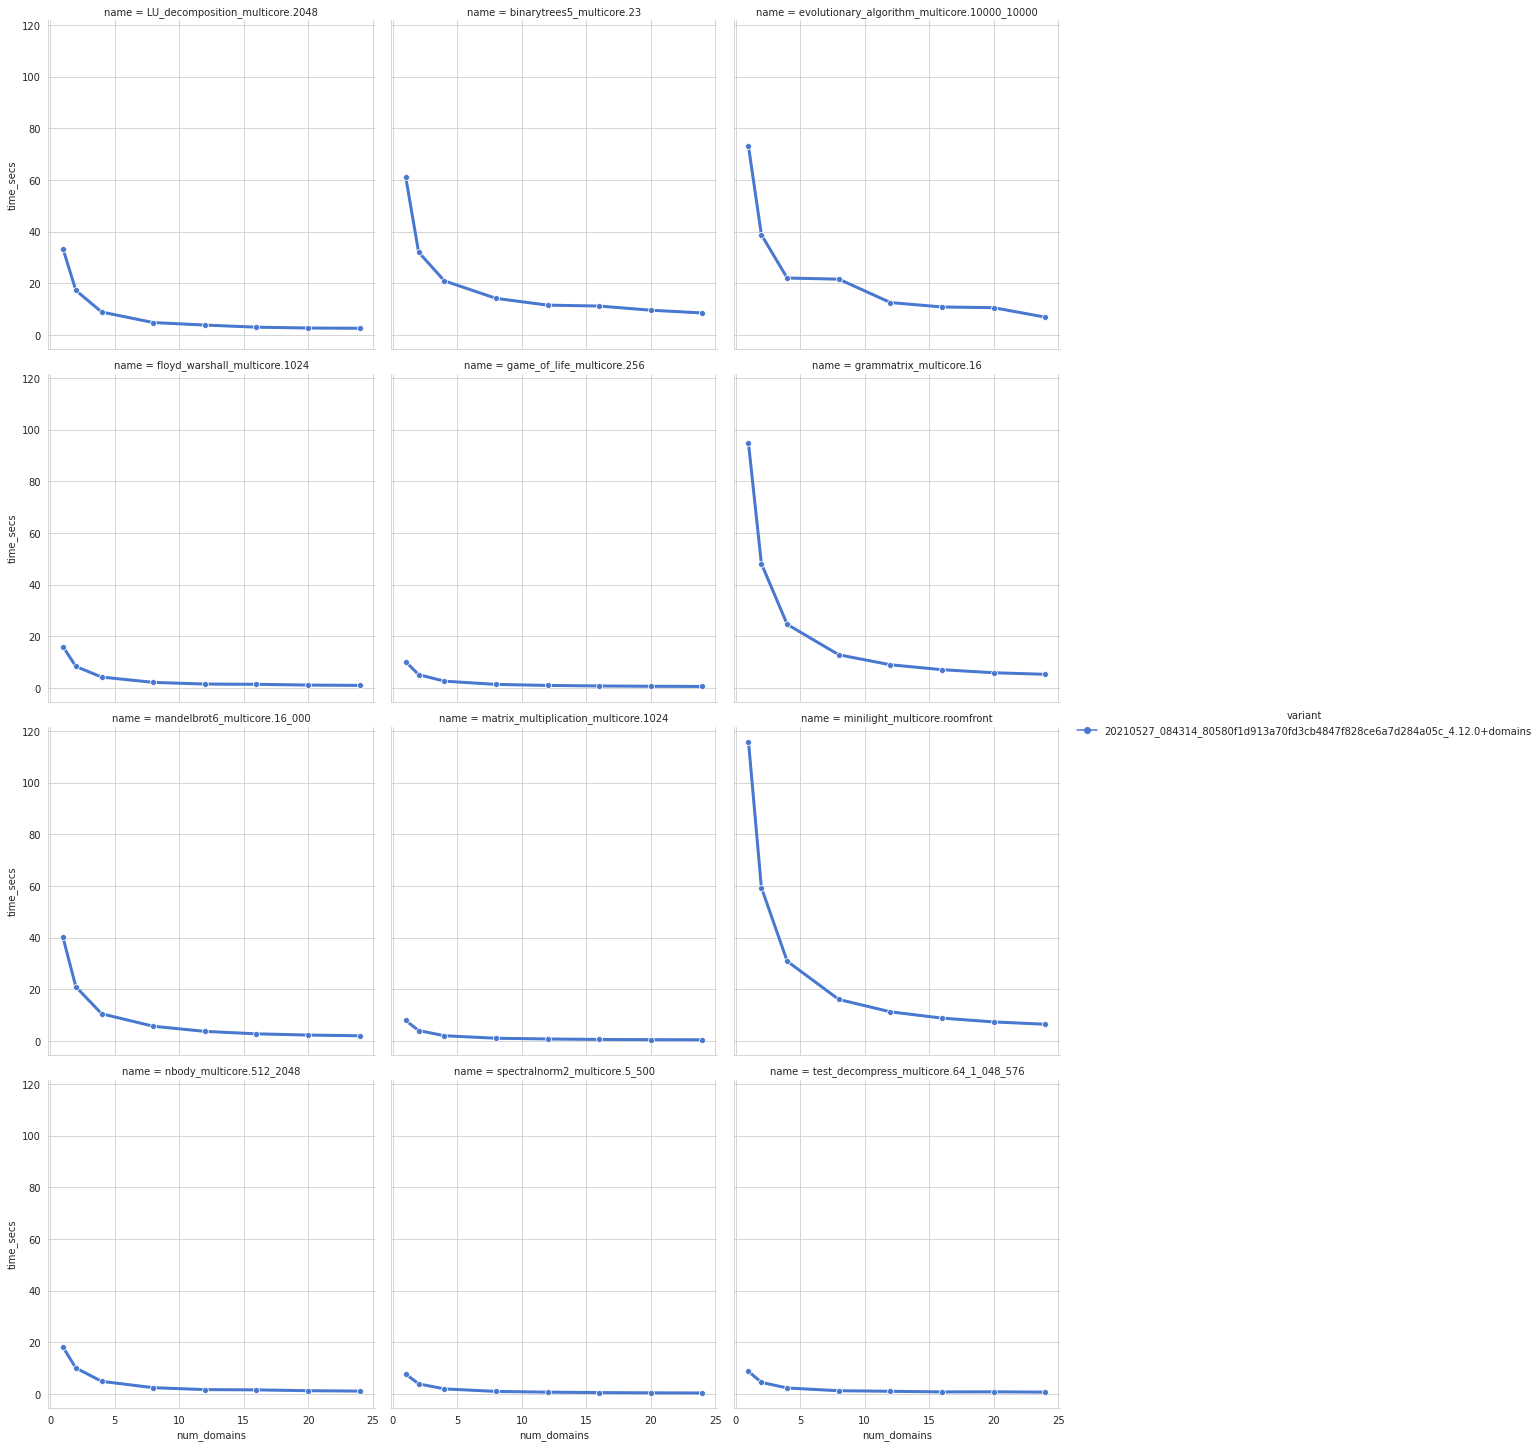

In [15]:
mdf = mdf.sort_values(['name'])
sns.relplot(x='num_domains', y = 'time_secs', hue='variant', col='name',
            data=mdf, kind='line', style='variant', markers=True, col_wrap = 3, 
            lw=3, palette="muted")

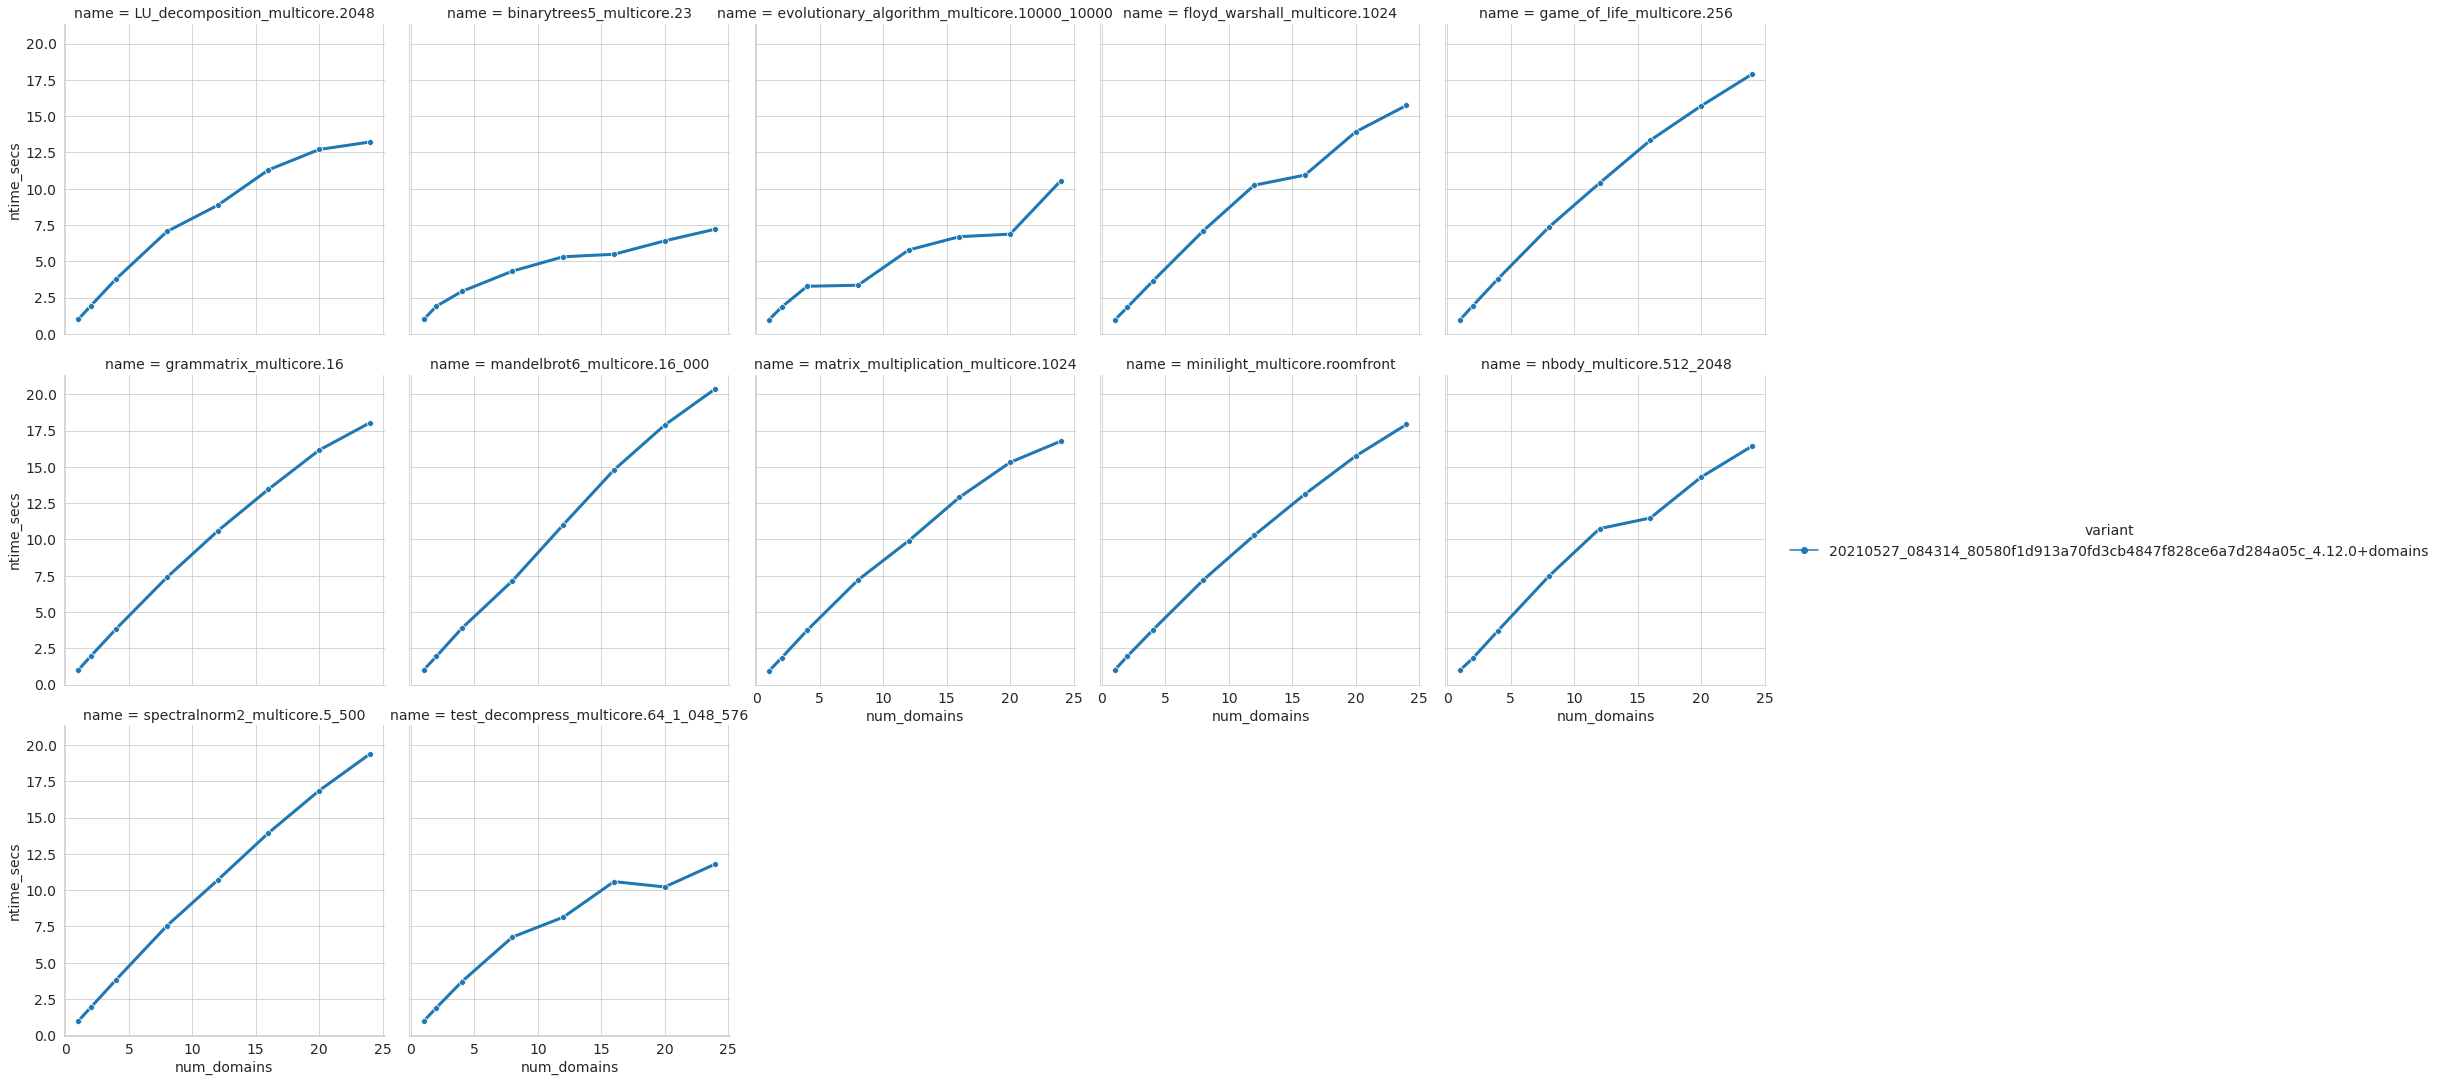

In [16]:
mdf = mdf.sort_values(['name'])
with sns.plotting_context(rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14,
                              "legend.fontsize":14}):
    sns.relplot(x='num_domains', y = 'ntime_secs', hue='variant', col='name',
                data=mdf, kind='line', style='variant', markers=True, col_wrap = 5, 
                lw=3)
